In [1]:
from google.colab import drive
drive.mount('/drive')

#Optional: move to the desired location:
%cd /drive/My Drive/500

Mounted at /drive
/drive/My Drive/500


In [2]:
from sklearn.preprocessing import LabelEncoder
# from sklearn.svm import LinearSVC
# from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd 
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os
import _pickle as cPickle
from sklearn.metrics import accuracy_score
from skimage.filters import threshold_otsu
import pickle
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

from skimage import color, data, restoration

# from scipy.signal import convolve2d as conv2

from scipy.misc import face
from scipy.signal.signaltools import wiener
import matplotlib.pyplot as plt
import numpy as np

from scipy import ndimage
from scipy.stats import skew
from scipy.stats import kurtosis
import csv
from skimage import feature
from skimage.feature import local_binary_pattern

In [3]:
def get_denoising(image):
    

   
    gray = cv2.cvtColor(resizing, cv2.COLOR_BGR2GRAY)

    gauss =gray.astype("float32")

    filtered_img = wiener(gauss, (5, 5))  #Filter the image
    filtered_img = np.uint8(filtered_img / filtered_img.max() * 255)

    kernel = np.ones((5, 5), np.uint8)
    blackhat = cv2.morphologyEx(filtered_img, cv2.MORPH_BLACKHAT, kernel)

    ret,th = cv2.threshold(blackhat,1,255,cv2.THRESH_BINARY)
    ret,thresh2 = cv2.threshold(th,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)


    img = cv2.inpaint(gray,thresh2,1,cv2.INPAINT_TELEA)
    
    return img
    





In [4]:
def lbp_extraction(img):
    radius = 2
    n_points = 8 * radius
    
    lbp = local_binary_pattern(img, n_points, radius, method='uniform')
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins))
    hist = hist.astype("float")                         
    hist /= (hist.sum() + (1e-7))
    return hist


In [5]:
def hsv_image(img):
    

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#     H = hsv[:,:,0]
#     S = hsv[:,:,1]
#     V = hsv[:,:,2]
    h, s, v = cv2.split(hsv)
 
    features = [   
                
                   np.mean(h),
                   np.mean(s),
                   np.mean(v),

                   np.std(h),
                   np.std(s),
                   np.std(v),

                   np.var(h),
                   np.var(s),
                   np.var(v),


                   skew(h, axis=None),
                   skew(s, axis=None),
                   skew(v, axis=None), 
               
                   kurtosis(h, None, fisher=False),
                   kurtosis(s, None, fisher=False),
                   kurtosis(v, None, fisher=False)]

    fitur={
        "mean_h" :features[0],
        "mean_s" :features[1],
        "mean_v" :features[2],

        "std_h":features[3],
        "std_s":features[4],
        "std_v":features[5],

        "var_h":features[6],
        "var_s":features[7],
        "var_v":features[8],

        "skew_h":features[9],
        "skew_s":features[10],
        "skew_v":features[11],
        
        
        "kurt_h":features[12],
        "kurt_s":features[13],
        "kurt_v":features[14]



    }
    print(fitur)
    return fitur


In [6]:
imagePaths = list(paths.list_images('/drive/My Drive/Data_Baru10'))
# Early Detection and Classification of Melanoma menjelaskan tentang descriptors color

In [7]:
labels = pd.DataFrame(columns=['label'])
data_lbp =[]
# labels =[]
data_hsv=[]


In [8]:
for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath)
    resizing = cv2.resize(image, (224, 224)) 
    
    lbp_features = get_denoising(resizing)
    
    # gray = cv2.cvtColor(lbp_features, cv2.COLOR_BGR2GRAY)
    lbp_get= lbp_extraction(lbp_features)

    
#     feature.append(label)
    data_lbp.append(lbp_get)
     
    features_hsv = get_denoising(resizing)
    img = cv2.inpaint(resizing,features_hsv,1,cv2.INPAINT_TELEA)
    feat_hsv = hsv_image(img)
    
    


    data_hsv.append(feat_hsv)
    csv_columns = ['mean_h','mean_s', 'mean_v', 'std_h', 'std_s', 'std_v', 'var_h', 'var_s', 'var_v',
                    'skew_h','skew_s','skew_v','kurt_h','kurt_s','kurt_v'
                  ]
    csv_file ="/drive/My Drive/TA/dobel/hsv_lbp.csv"
    try:
        with open(csv_file, 'w') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
            writer.writeheader()
            for data in data_hsv:
                writer.writerow(data)
    except IOError:
        print("I/O error")
     

        
    label = imagePath.split(os.path.sep)[-2]

#     labels.append(label)

    labels.loc[len(labels)] = label





    if  i > 0 and i % 1 == 0:

        print("{}/{}".format(i, len(imagePaths)))
        
        


{'mean_h': 9.618522799744898, 'mean_s': 119.83041693239795, 'mean_v': 152.78045280612244, 'std_h': 5.615590814004203, 'std_s': 31.885444347820016, 'std_v': 42.84428226591853, 'var_h': 31.53486019032838, 'var_s': 1016.6815612579275, 'var_v': 1835.632522881701, 'skew_h': 19.96409455462799, 'skew_s': -0.3113348817120624, 'skew_v': -1.064526342377438, 'kurt_h': 573.4256327039847, 'kurt_s': 3.0218601824378277, 'kurt_v': 2.8677032949646195}
{'mean_h': 25.81118463010204, 'mean_s': 98.05980947066327, 'mean_v': 157.40160634566325, 'std_h': 51.441943396429906, 'std_s': 25.210099906037108, 'std_v': 70.00828324125486, 'var_h': 2646.2735404014984, 'var_s': 635.5491372723721, 'var_v': 4901.159722387766, 'skew_h': 2.555142733059937, 'skew_s': 0.10063651021373841, 'skew_v': -0.3320324569483176, 'kurt_h': 7.612541731514433, 'kurt_s': 3.735051922155021, 'kurt_v': 1.336093367922426}
1/225
{'mean_h': 9.62093431122449, 'mean_s': 99.4898756377551, 'mean_v': 162.6493542729592, 'std_h': 14.912566829554866, 's

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

hsv_df = pd.read_csv("/drive/My Drive/TA/dobel/hsv_lbp.csv")

hsv_df.head()

mean_h      mean_s      mean_v  ...      kurt_h    kurt_s     kurt_v
0   9.618523  119.830417  152.780453  ...  573.425633  3.021860   2.867703
1  25.811185   98.059809  157.401606  ...    7.612542  3.735052   1.336093
2   9.620934   99.489876  162.649354  ...  115.710962  2.101487   3.072661
3   8.853197  101.999562  150.346919  ...  539.405946  3.355420   2.226917
4  10.885264   95.707809  179.391821  ...    2.105885  2.119462  46.143659

[5 rows x 15 columns]

In [10]:
print(hsv_df)

        mean_h      mean_s      mean_v  ...      kurt_h     kurt_s     kurt_v
0     9.618523  119.830417  152.780453  ...  573.425633   3.021860   2.867703
1    25.811185   98.059809  157.401606  ...    7.612542   3.735052   1.336093
2     9.620934   99.489876  162.649354  ...  115.710962   2.101487   3.072661
3     8.853197  101.999562  150.346919  ...  539.405946   3.355420   2.226917
4    10.885264   95.707809  179.391821  ...    2.105885   2.119462  46.143659
..         ...         ...         ...  ...         ...        ...        ...
220  14.114059   23.215661  122.562420  ...  392.755902   6.455269   4.036007
221  14.109315   18.560886  162.417391  ...   68.789260   4.249260   2.942508
222  55.918208    5.526965  165.593431  ...    1.904908  32.168832   8.165772
223  16.193379   12.476582  136.585220  ...   22.760410   3.649675   2.938105
224  43.152324   14.178073  141.674007  ...    2.919959   3.866779   2.089252

[225 rows x 15 columns]


In [11]:
# hsv_df.drop('Unnamed: 0', axis=1)

import pandas as pd 

# Create the pandas DataFrame for GLCM features data
lbp_df = pd.DataFrame(data_lbp)

#save to csv
lbp_df.to_csv("/drive/My Drive/TA/dobel/lbp_hsv.csv", index=False)

lbp_df.head()
print(lbp_df)

           0         1         2   ...        15        16        17
0    0.066785  0.043208  0.035694  ...  0.040577  0.086276  0.373984
1    0.064931  0.038504  0.034538  ...  0.035734  0.085300  0.350207
2    0.075654  0.054110  0.035814  ...  0.051997  0.097397  0.433175
3    0.075415  0.048948  0.035276  ...  0.051897  0.097437  0.430305
4    0.078982  0.052993  0.033681  ...  0.051977  0.103177  0.436842
..        ...       ...       ...  ...       ...       ...       ...
220  0.078225  0.059730  0.036472  ...  0.055166  0.104831  0.488082
221  0.084363  0.061205  0.035296  ...  0.054887  0.107023  0.486747
222  0.069157  0.054747  0.039003  ...  0.041594  0.096341  0.430584
223  0.072126  0.058514  0.036751  ...  0.051140  0.103894  0.465362
224  0.068439  0.050502  0.037508  ...  0.044583  0.096540  0.426379

[225 rows x 18 columns]


In [12]:
import pandas as pd
df1 = pd.read_csv('/drive/My Drive/TA/dobel/hsv_lbp.csv')
df2 = pd.read_csv('/drive/My Drive/TA/dobel/lbp_hsv.csv')
result = pd.merge(df1, df2, left_index=True, right_index=True)
result.to_csv('/drive/My Drive/TA/dobel/merged_hsvlbp.csv', index=False)


result = pd.read_csv("/drive/My Drive/TA/dobel/merged_hsvlbp.csv")

# result.drop(['unnamed'], axis=1)

result.head()

mean_h      mean_s      mean_v  ...        15        16        17
0   9.618523  119.830417  152.780453  ...  0.040577  0.086276  0.373984
1  25.811185   98.059809  157.401606  ...  0.035734  0.085300  0.350207
2   9.620934   99.489876  162.649354  ...  0.051997  0.097397  0.433175
3   8.853197  101.999562  150.346919  ...  0.051897  0.097437  0.430305
4  10.885264   95.707809  179.391821  ...  0.051977  0.103177  0.436842

[5 rows x 33 columns]

In [13]:
print(result)

        mean_h      mean_s      mean_v  ...        15        16        17
0     9.618523  119.830417  152.780453  ...  0.040577  0.086276  0.373984
1    25.811185   98.059809  157.401606  ...  0.035734  0.085300  0.350207
2     9.620934   99.489876  162.649354  ...  0.051997  0.097397  0.433175
3     8.853197  101.999562  150.346919  ...  0.051897  0.097437  0.430305
4    10.885264   95.707809  179.391821  ...  0.051977  0.103177  0.436842
..         ...         ...         ...  ...       ...       ...       ...
220  14.114059   23.215661  122.562420  ...  0.055166  0.104831  0.488082
221  14.109315   18.560886  162.417391  ...  0.054887  0.107023  0.486747
222  55.918208    5.526965  165.593431  ...  0.041594  0.096341  0.430584
223  16.193379   12.476582  136.585220  ...  0.051140  0.103894  0.465362
224  43.152324   14.178073  141.674007  ...  0.044583  0.096540  0.426379

[225 rows x 33 columns]


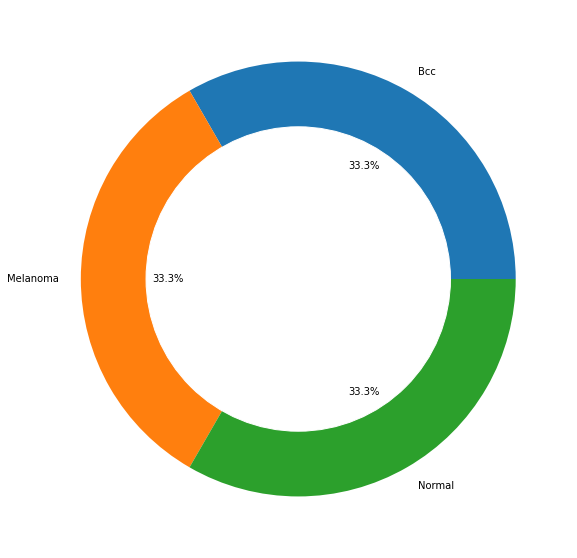

In [14]:
label_distr = labels['label'].value_counts()

label_name = ['Bcc', 'Melanoma','Normal']

plt.figure(figsize=(20,10))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(label_distr, 
        labels=label_name,  
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [15]:
print(label_distr)

Normal      75
Melanoma    75
Bcc         75
Name: label, dtype: int64


In [16]:
from sklearn.preprocessing import LabelEncoder
# from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# ------------------------ Data Normalization menggunakan Decimal Scaling --------------------------------
def decimal_scaling(data):
    data = np.array(data, dtype=np.float32)
    max_row = data.max(axis=0)
    c = np.array([len(str(int(number))) for number in np.abs(max_row)])
    return data/(10**c)

X = decimal_scaling(result.values)

In [17]:
le = LabelEncoder()
le.fit(labels["label"].values)


print(" categorical label : \n", le.classes_)

Y = le.transform(labels['label'].values)
Y = to_categorical(Y)

print("\n\n one hot encoding for sample 0 : \n", Y[0])

 categorical label : 
 ['Bcc' 'Melanoma' 'Normal']


 one hot encoding for sample 0 : 
 [0. 1. 0.]


In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(5, 5))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [19]:
 import numpy as np
 
 def display_summary(true,pred):
     cnf_matrix = confusion_matrix(true,pred)
     fp = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
     fn = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
     tp = np.diag(cnf_matrix)
     tn = cnf_matrix.sum() - (fp + fn + tp)
 
     fp = fp.astype(float)
     fn = fn.astype(float)
     tp = tp.astype(float)
     tn = tn.astype(float)
 
     #tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
     print('confusion matrix')
     print(np.array([[tp,fp],[fn,tn]]))
     print('sensitivity is %f',1.*tp/(tp+fn))
     print('specificity is %f',1.*tn/(tn+fp))
     print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))
     print('balanced accuracy is %',1./2*(1.*tp/(tp+fn)+1.*tn/(tn+fp)))

# import numpy as np

# def display_summary(true,pred):
#     tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
#     print('confusion matrix')
#     print(np.array([[tp,fp],[fn,tn]]))
#     print('sensitivity is %f',1.*tp/(tp+fn))
#     print('specificity is %f',1.*tn/(tn+fp))
#     print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))
#     print('balanced accuracy is %',1./2*(1.*tp/(tp+fn)+1.*tn/(tn+fp)))
 
# print('Deep Neural Network')
# display_summary(y_test.argmax(axis=1), y_pred.argmax(axis=1))

iterate kfold :  0  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 33) (45, 33)
Epoch 1/100
6/6 [==============================] - 1s 51ms/step - loss: 1.0952 - accuracy: 0.2944 - val_loss: 1.0740 - val_accuracy: 0.6222
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 1.0739 - accuracy: 0.6000 - val_loss: 1.0489 - val_accuracy: 0.6444
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 1.0447 - accuracy: 0.6611 - val_loss: 1.0048 - val_accuracy: 0.7778
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.9996 - accuracy: 0.6500 - val_loss: 0.9449 - val_accuracy: 0.7111
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.9304 - accuracy: 0.6667 - val_loss: 0.8721 - val_accuracy: 0.7111
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.8466 - accuracy: 0.7056 - val_loss: 0.7567 - val_accuracy: 0.8222
Epoch 7/100
6/6 [=============================

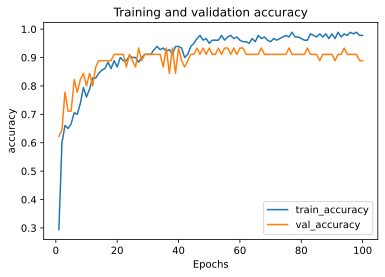

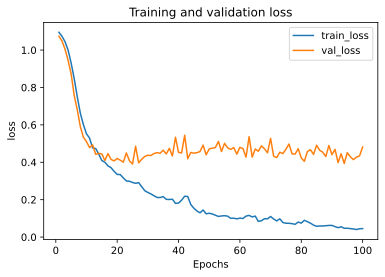

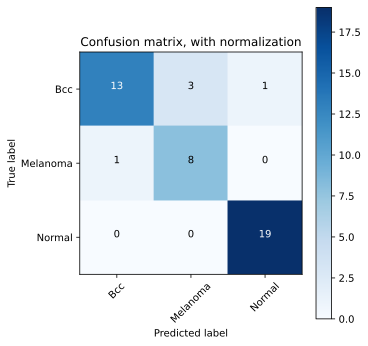

              precision    recall  f1-score   support

         Bcc       0.93      0.76      0.84        17
    Melanoma       0.73      0.89      0.80         9
      Normal       0.95      1.00      0.97        19

    accuracy                           0.89        45
   macro avg       0.87      0.88      0.87        45
weighted avg       0.90      0.89      0.89        45

Deep Neural Network
confusion matrix
[[[13.  8. 19.]
  [ 1.  3.  1.]]

 [[ 4.  1.  0.]
  [27. 33. 25.]]]
sensitivity is %f [0.76 0.89 1.  ]
specificity is %f [0.96 0.92 0.96]
accuracy is %f [0.89 0.91 0.98]
balanced accuracy is % [0.86 0.9  0.98]


iterate kfold :  1  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 33) (45, 33)
Epoch 1/100
6/6 [==============================] - 1s 35ms/step - loss: 1.0942 - accuracy: 0.4000 - val_loss: 1.0910 - val_accuracy: 0.4222
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0720 - accuracy: 0.6278 - val_loss: 1.

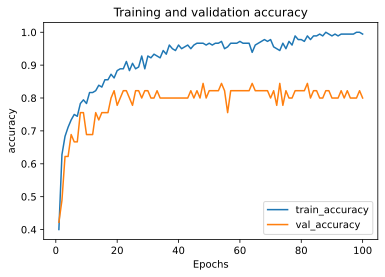

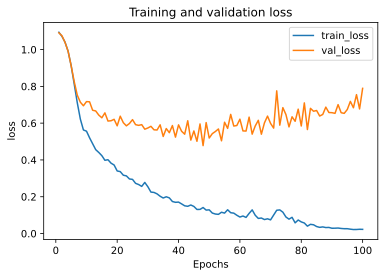

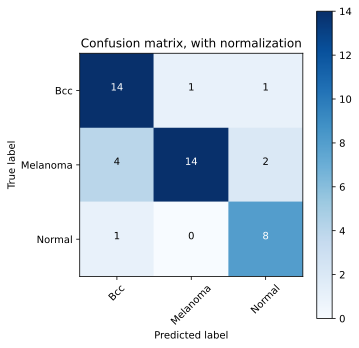

              precision    recall  f1-score   support

         Bcc       0.74      0.88      0.80        16
    Melanoma       0.93      0.70      0.80        20
      Normal       0.73      0.89      0.80         9

    accuracy                           0.80        45
   macro avg       0.80      0.82      0.80        45
weighted avg       0.82      0.80      0.80        45

Deep Neural Network
confusion matrix
[[[14. 14.  8.]
  [ 5.  1.  3.]]

 [[ 2.  6.  1.]
  [24. 24. 33.]]]
sensitivity is %f [0.88 0.7  0.89]
specificity is %f [0.83 0.96 0.92]
accuracy is %f [0.84 0.84 0.91]
balanced accuracy is % [0.85 0.83 0.9 ]


iterate kfold :  2  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 33) (45, 33)
Epoch 1/100
6/6 [==============================] - 1s 40ms/step - loss: 1.0939 - accuracy: 0.4500 - val_loss: 1.0765 - val_accuracy: 0.6889
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0682 - accuracy: 0.6778 - val_loss: 1.

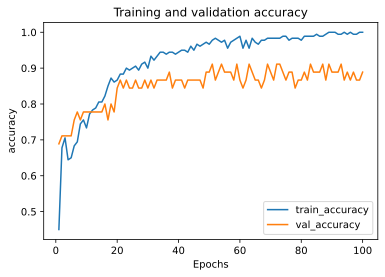

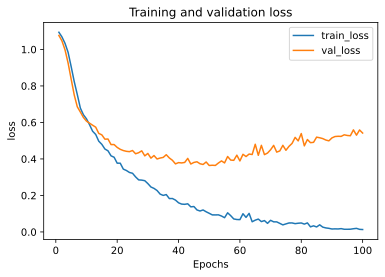

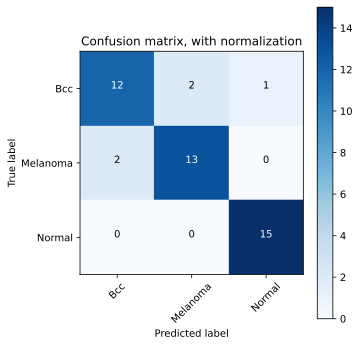

              precision    recall  f1-score   support

         Bcc       0.86      0.80      0.83        15
    Melanoma       0.87      0.87      0.87        15
      Normal       0.94      1.00      0.97        15

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45

Deep Neural Network
confusion matrix
[[[12. 13. 15.]
  [ 2.  2.  1.]]

 [[ 3.  2.  0.]
  [28. 28. 29.]]]
sensitivity is %f [0.8  0.87 1.  ]
specificity is %f [0.93 0.93 0.97]
accuracy is %f [0.89 0.91 0.98]
balanced accuracy is % [0.87 0.9  0.98]


iterate kfold :  3  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 33) (45, 33)
Epoch 1/100
6/6 [==============================] - 1s 76ms/step - loss: 1.0938 - accuracy: 0.3278 - val_loss: 1.0872 - val_accuracy: 0.5333
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0719 - accuracy: 0.6056 - val_loss: 1.

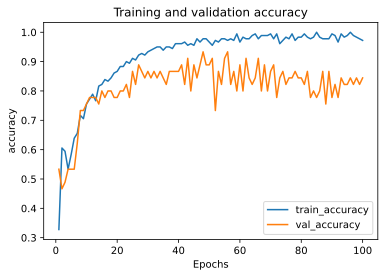

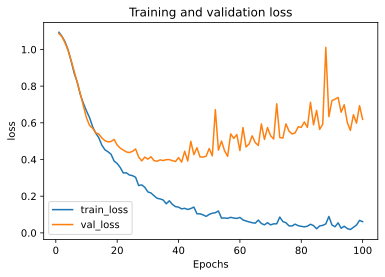

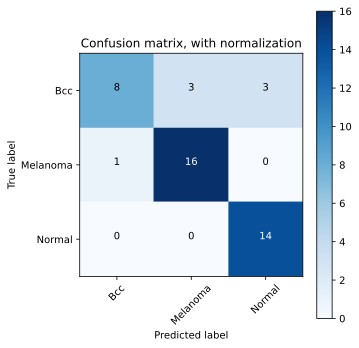

              precision    recall  f1-score   support

         Bcc       0.89      0.57      0.70        14
    Melanoma       0.84      0.94      0.89        17
      Normal       0.82      1.00      0.90        14

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.83        45
weighted avg       0.85      0.84      0.83        45

Deep Neural Network
confusion matrix
[[[ 8. 16. 14.]
  [ 1.  3.  3.]]

 [[ 6.  1.  0.]
  [30. 25. 28.]]]
sensitivity is %f [0.57 0.94 1.  ]
specificity is %f [0.97 0.89 0.9 ]
accuracy is %f [0.84 0.91 0.93]
balanced accuracy is % [0.77 0.92 0.95]


iterate kfold :  4  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 33) (45, 33)
Epoch 1/100
6/6 [==============================] - 1s 38ms/step - loss: 1.0901 - accuracy: 0.4556 - val_loss: 1.0750 - val_accuracy: 0.6444
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0604 - accuracy: 0.6000 - val_loss: 1.

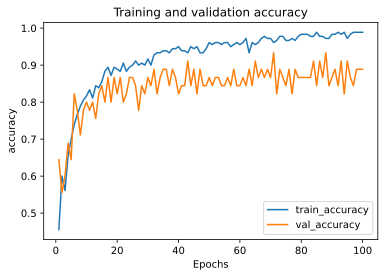

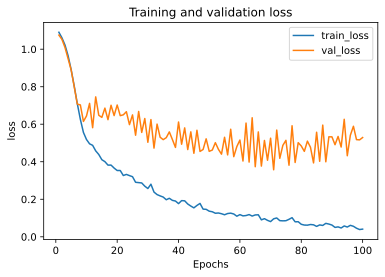

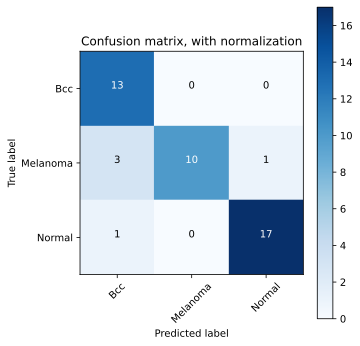

              precision    recall  f1-score   support

         Bcc       0.76      1.00      0.87        13
    Melanoma       1.00      0.71      0.83        14
      Normal       0.94      0.94      0.94        18

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.88        45
weighted avg       0.91      0.89      0.89        45

Deep Neural Network
confusion matrix
[[[13. 10. 17.]
  [ 4.  0.  1.]]

 [[ 0.  4.  1.]
  [28. 31. 26.]]]
sensitivity is %f [1.   0.71 0.94]
specificity is %f [0.88 1.   0.96]
accuracy is %f [0.91 0.91 0.96]
balanced accuracy is % [0.94 0.86 0.95]




Rata-Rata Akurasi
86.22% (+/- 3.56%)


In [20]:
from sklearn.model_selection import StratifiedKFold, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.initializers import RandomNormal, Constant
from tensorflow import keras
from tensorflow.keras import regularizers
# Model with default batch normalization
from tensorflow.keras import layers

from tensorflow.keras.initializers import RandomNormal, Constant
from numpy.random import seed
from tensorflow import random
seed(0)
random.set_seed(0)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cvscores = []
for i, (train_index, val_index) in enumerate (kfold.split(X, Y)):
# for i, (train_index, val_index) in enumerate(kfold.split(X, Y.argmax(1))):
  print('iterate kfold : ',i,' +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

  x_train_kf, x_val_kf = X[train_index], X[val_index]
  y_train_kf, y_val_kf = Y[train_index], Y[val_index]

  print(x_train_kf.shape, x_val_kf.shape)

  model =keras.Sequential()
  model.add(Dense(33, input_dim=33, activation='relu'))

  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))

  # model.add(Dropout(0.3))
  # model.add(Dense(256, activation='relu'))
  # model.add(Dropout(0.3))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.3))
  # model.add(Dense(256, activation='relu'))
  # model.add(Dropout(0.3))



  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))



  model.add(Dense(3,activation="softmax"))
  opt = keras.optimizers.Adam(learning_rate=0.001)
  model.compile(optimizer=opt, 
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])
 
#   history= model.fit(X[train_index], Y[train_index], epochs=100)
  history= model.fit(X[train_index], Y[train_index], epochs=100, 
                     validation_data=(X[val_index],Y[val_index]))
  
	# evaluate the model
  scores = model.evaluate(X[val_index], Y[val_index], verbose=0)

  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  print("\n")

  print('result ============================================================================================')
  plot_metric(history, 'accuracy')
  plot_metric(history, 'loss')

  # predict test data
  # y_pred=model.predict(X[val_index])
  # y_pred1=model.predict(X[train_index])

  y_pred=model.predict(x_val_kf)
  y_pred1=model.predict(x_train_kf)

  # Compute confusion matrix
  cnf_matrix = confusion_matrix(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1))
  np.set_printoptions(precision=2)

  # Plot non-normalized confusion matrix
  plot_confusion_matrix(cnf_matrix, 
                      classes=['Bcc', 'Melanoma','Normal'],
                      normalize=False,
                      title='Confusion matrix, with normalization')

  print(classification_report(y_val_kf.argmax(axis=1), 
                            y_pred.argmax(axis=1), 
                            target_names=['Bcc',   'Melanoma','Normal']))
  print('Deep Neural Network')
  display_summary(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1))
  print("\n")
  cvscores.append(scores[1] * 100)
print("\n")
print("Rata-Rata Akurasi")
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))




# save_model_path = "/drive/My Drive/Moddel/model_lbp.h5"
# model.save(save_model_path,include_optimizer=False)

# save_model_path = "/drive/My Drive/Model/model_" + str(i) + ".h5"
# model.save(save_model_path,include_optimizer=False)

In [21]:
cvscores

[88.88888955116272,
 80.0000011920929,
 88.88888955116272,
 84.44444537162781,
 88.88888955116272]